Loading COVID-19 dataset...

Dataset Overview:
Shape: (187, 15)

First 5 rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confirmed', y='country_region', data=top_countries_by_cases, palette='viridis')


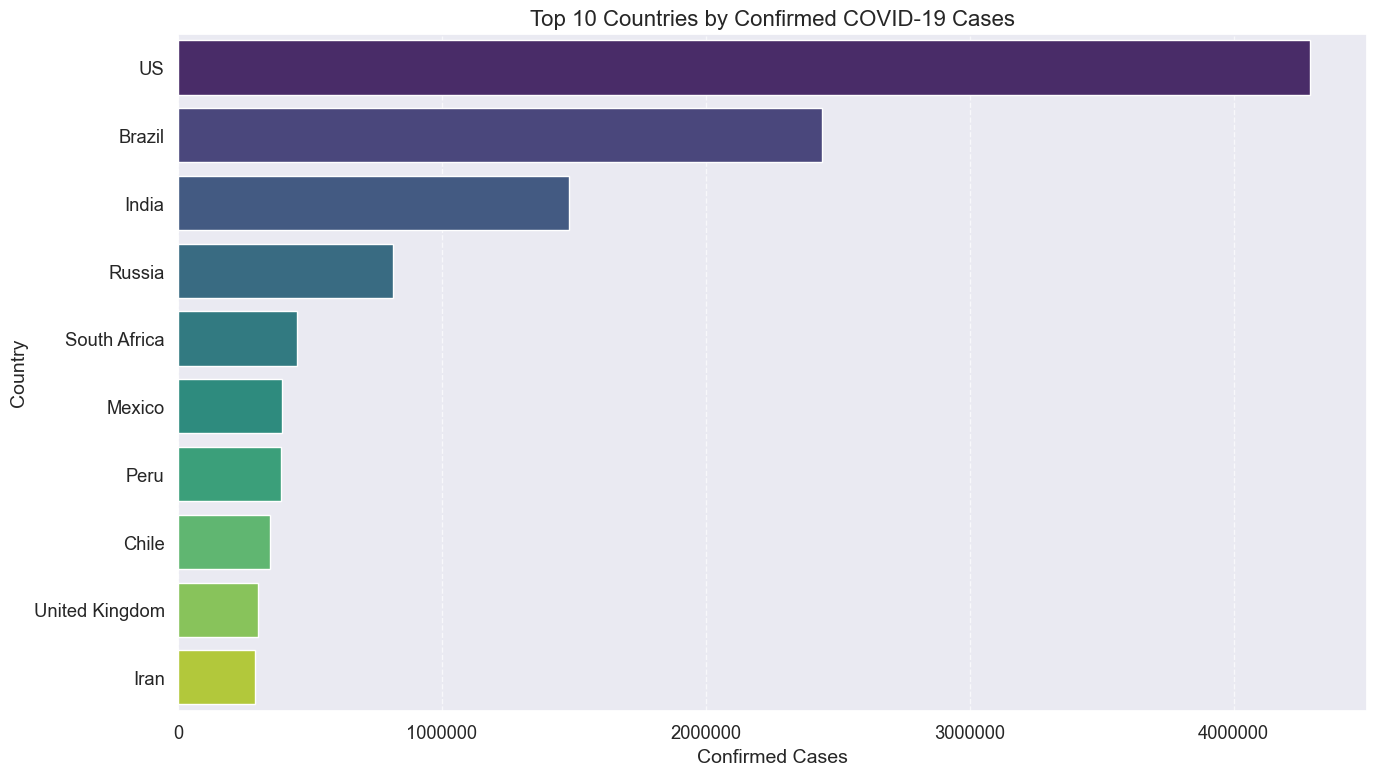

C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deaths', y='country_region', data=top_countries_by_deaths, palette='rocket')


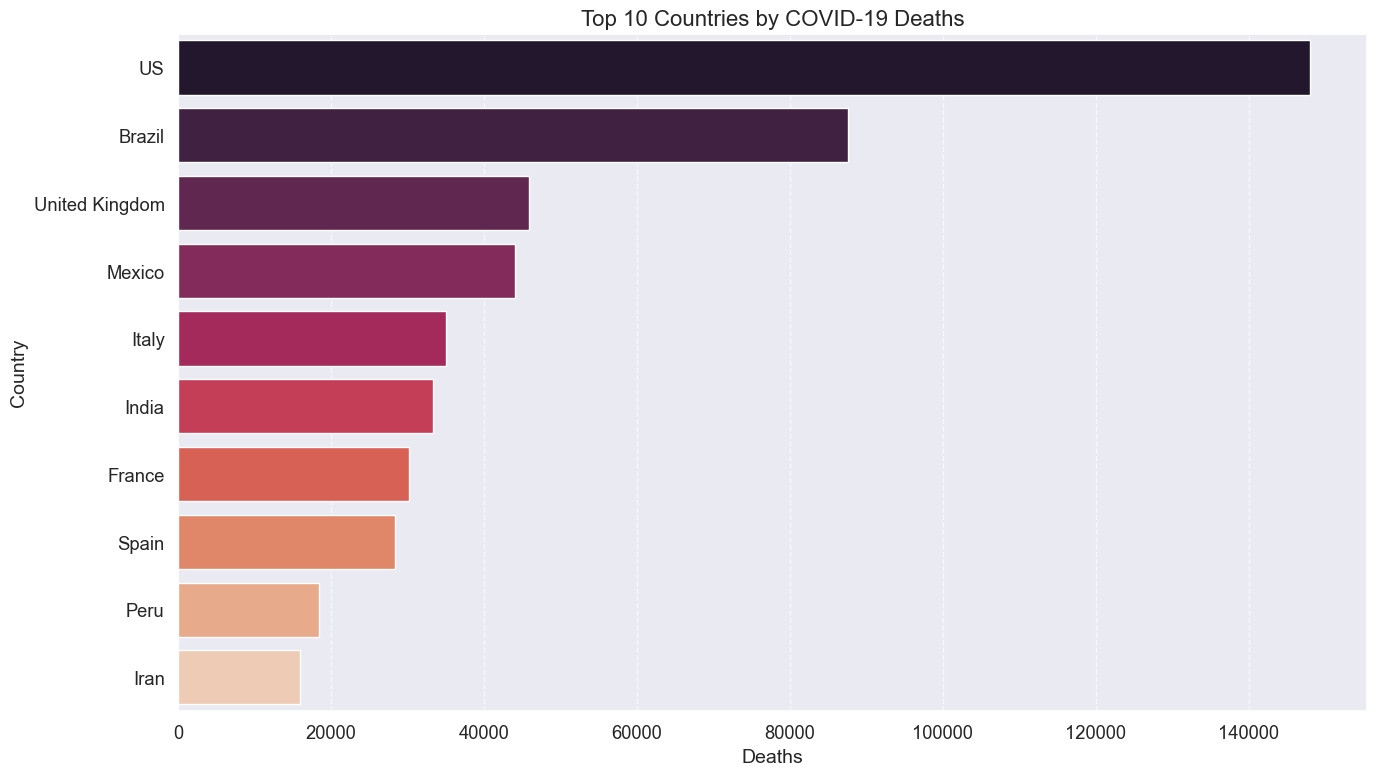

C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deaths_100_cases', y='country_region', data=clean_df, palette='coolwarm')


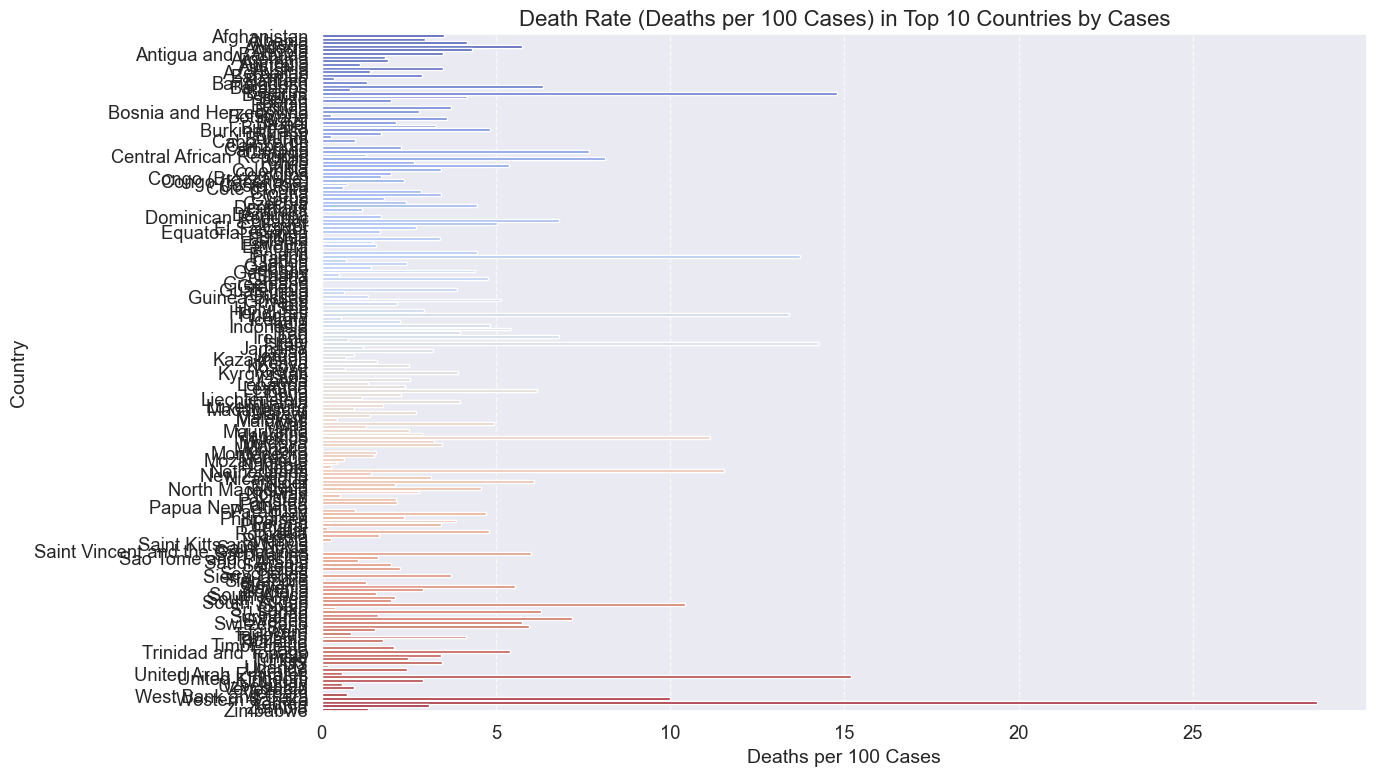

C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recovered___100_cases', y='country_region', data=top_countries_by_cases, palette='YlGn')


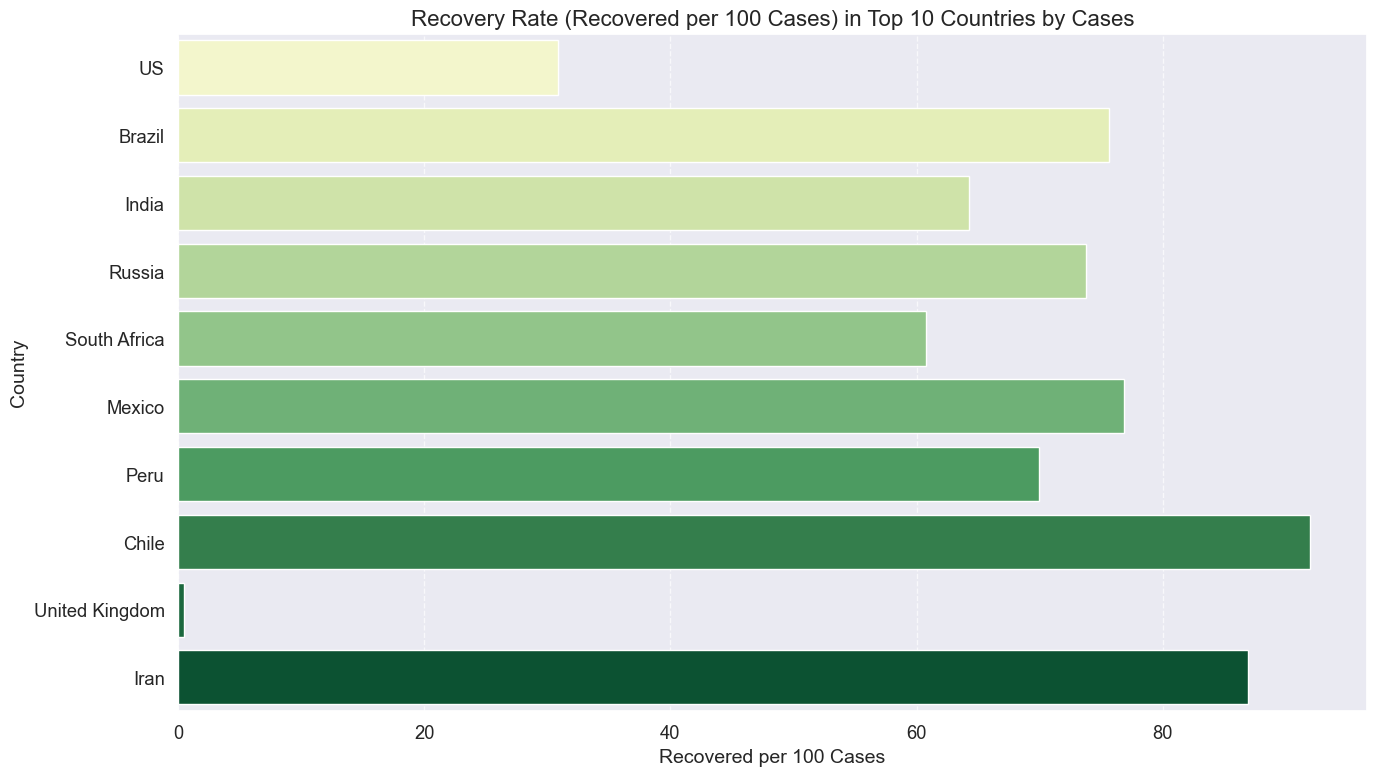


COVID-19 Statistics by WHO Region:
              who_region  confirmed  deaths  recovered   active  death_rate  \
0                 Africa     723207   12223     440645   270339    1.690111   
1               Americas    8839286  342732    4468616  4027938    3.877372   
2  Eastern Mediterranean    1490744   38339    1201400   251005    2.571803   
3                 Europe    3299523  211144    1993723  1094656    6.399228   
4        South-East Asia    1835297   41349    1156933   637015    2.252987   
5        Western Pacific     292428    8249     206770    77409    2.820865   

   recovery_rate  
0      60.929305  
1      50.554038  
2      80.590631  
3      60.424583  
4      63.037917  
5      70.708003  


C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confirmed', y='who_region', data=region_data, palette='viridis')


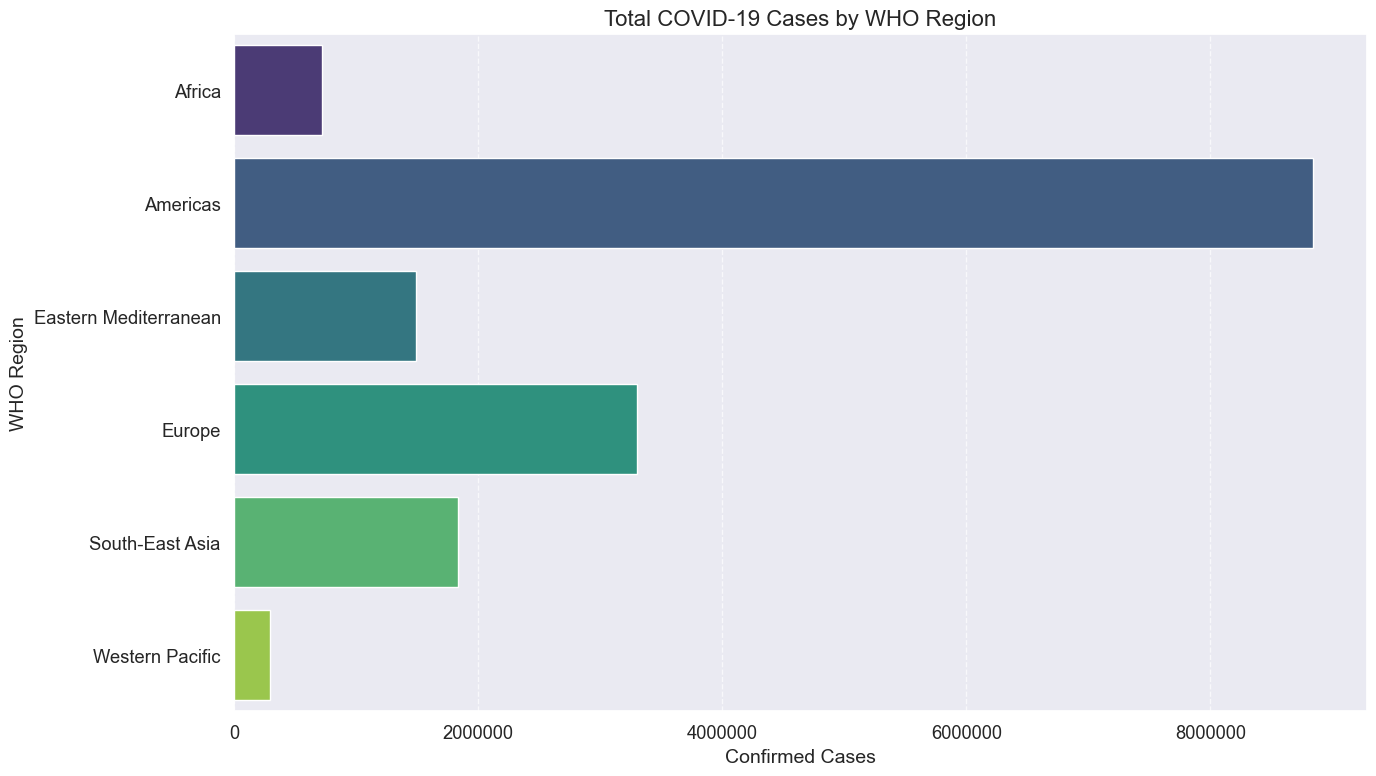

C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='death_rate', y='who_region', data=region_data, palette='rocket')


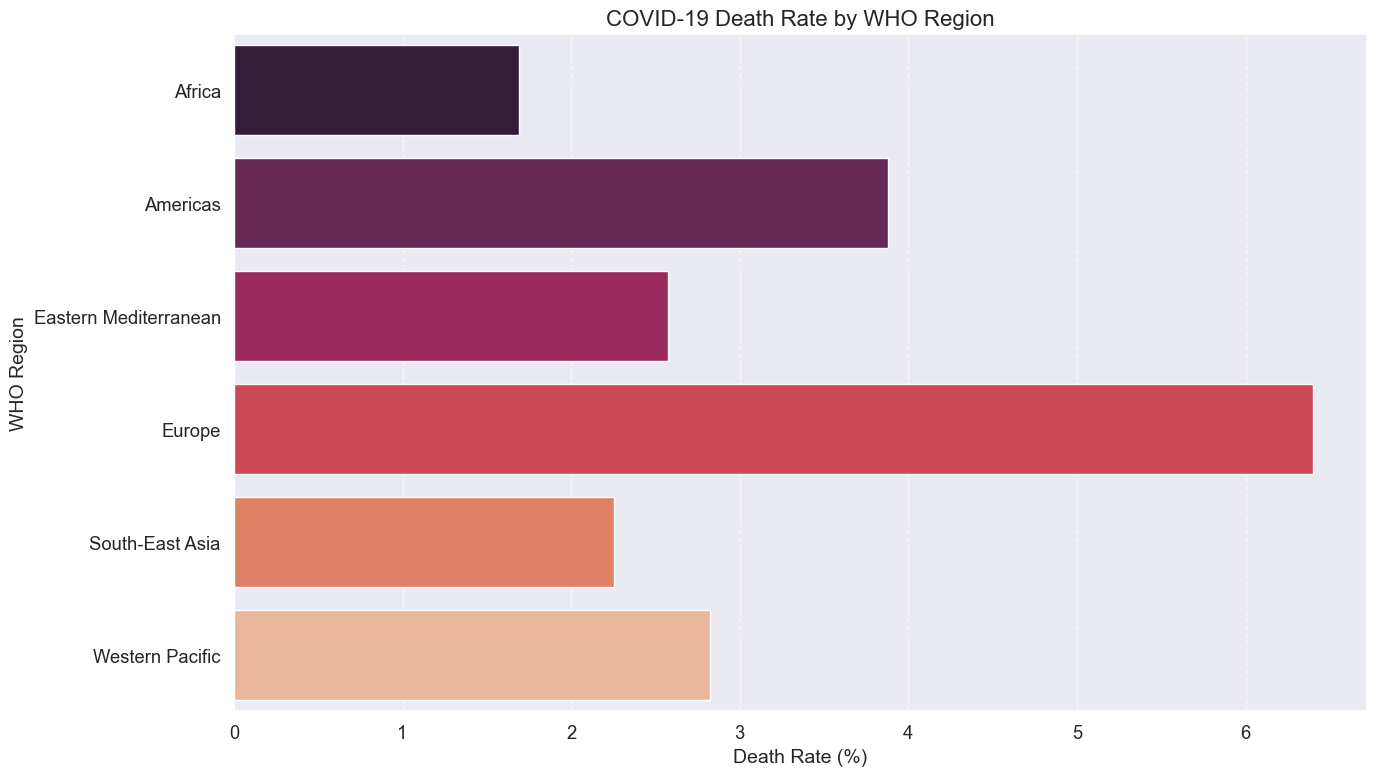

C:\Users\USER\AppData\Local\Temp\ipykernel_3180\2927688124.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='1_week_%_increase', y='country_region', data=top_weekly_increase, palette='Reds')


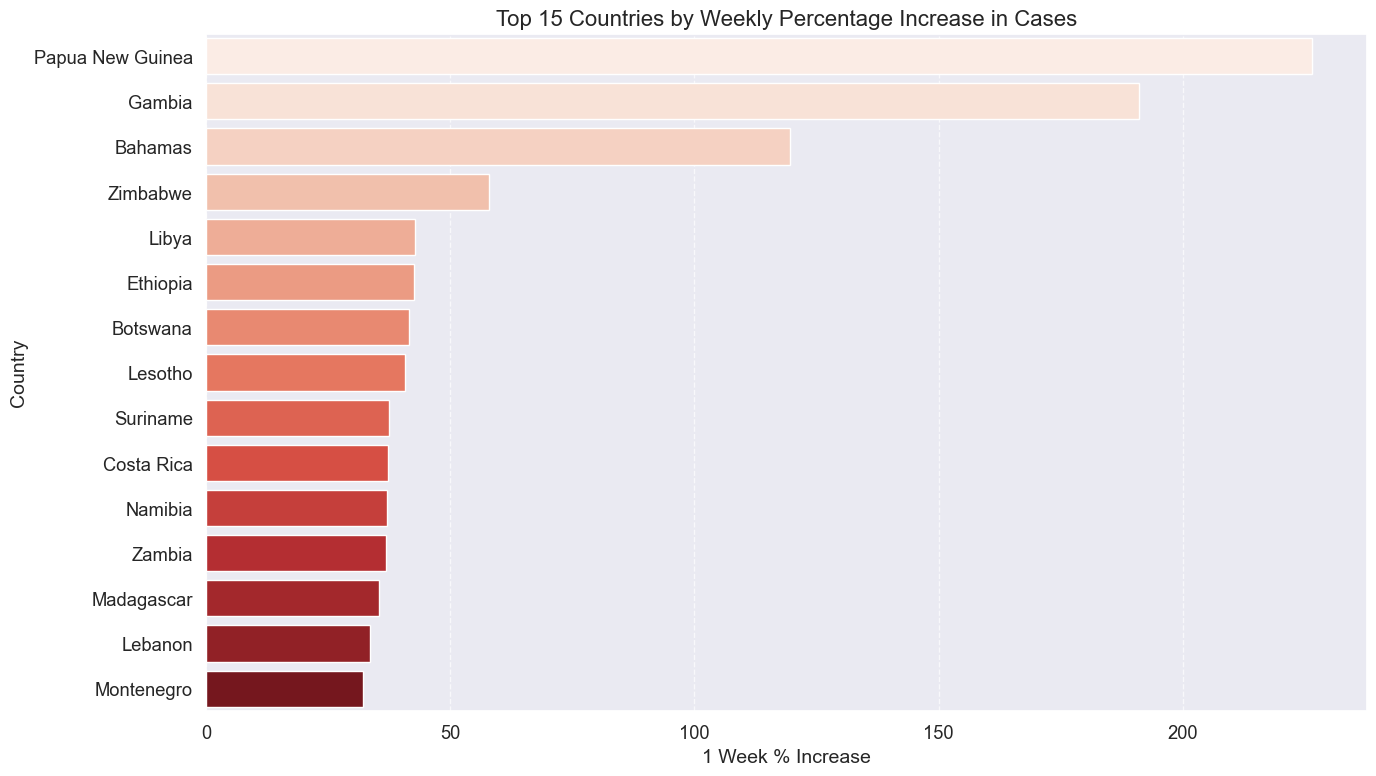

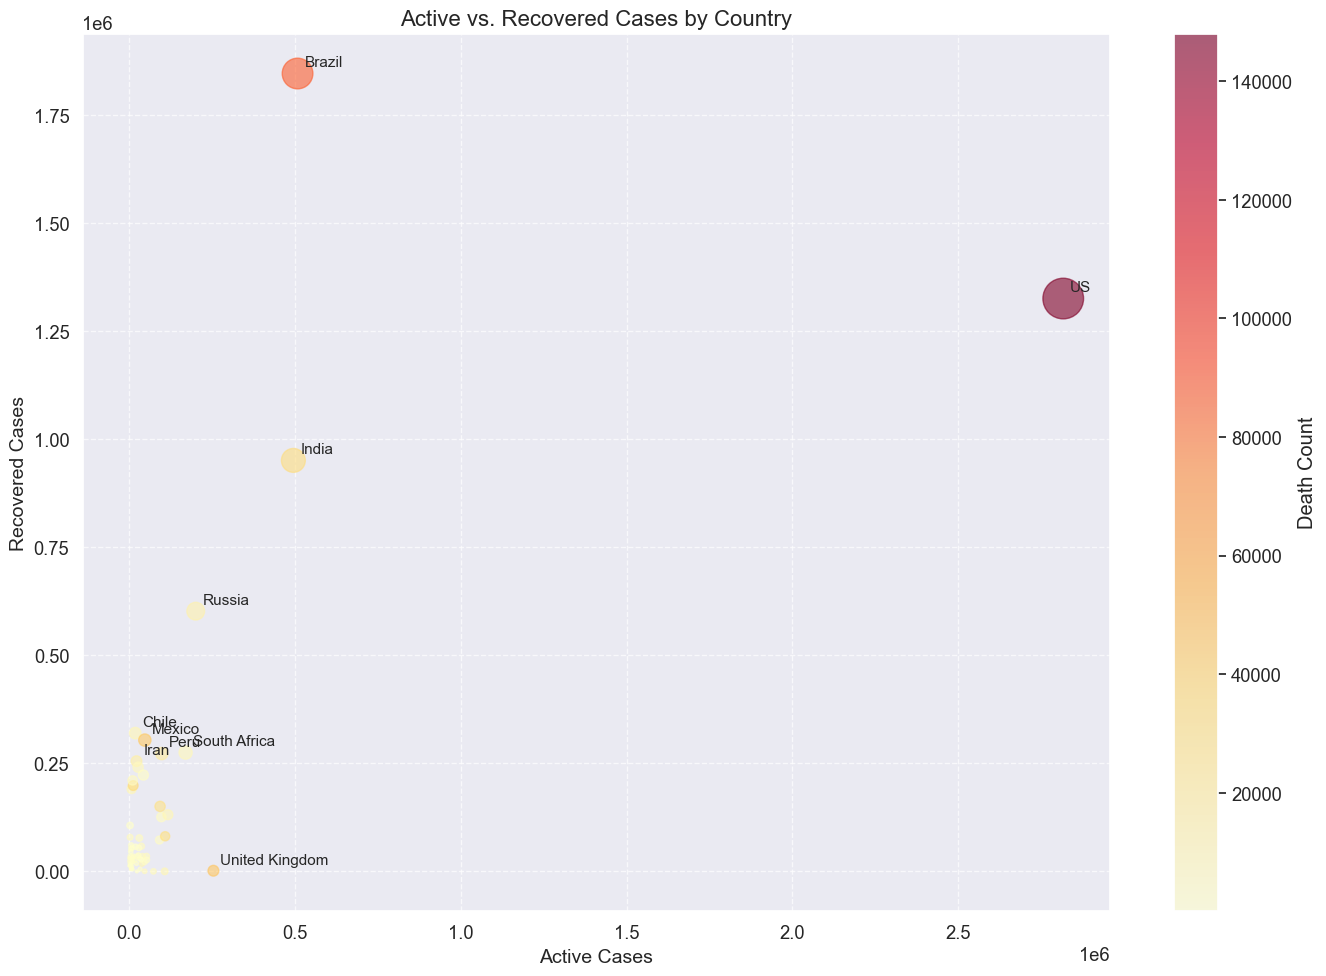

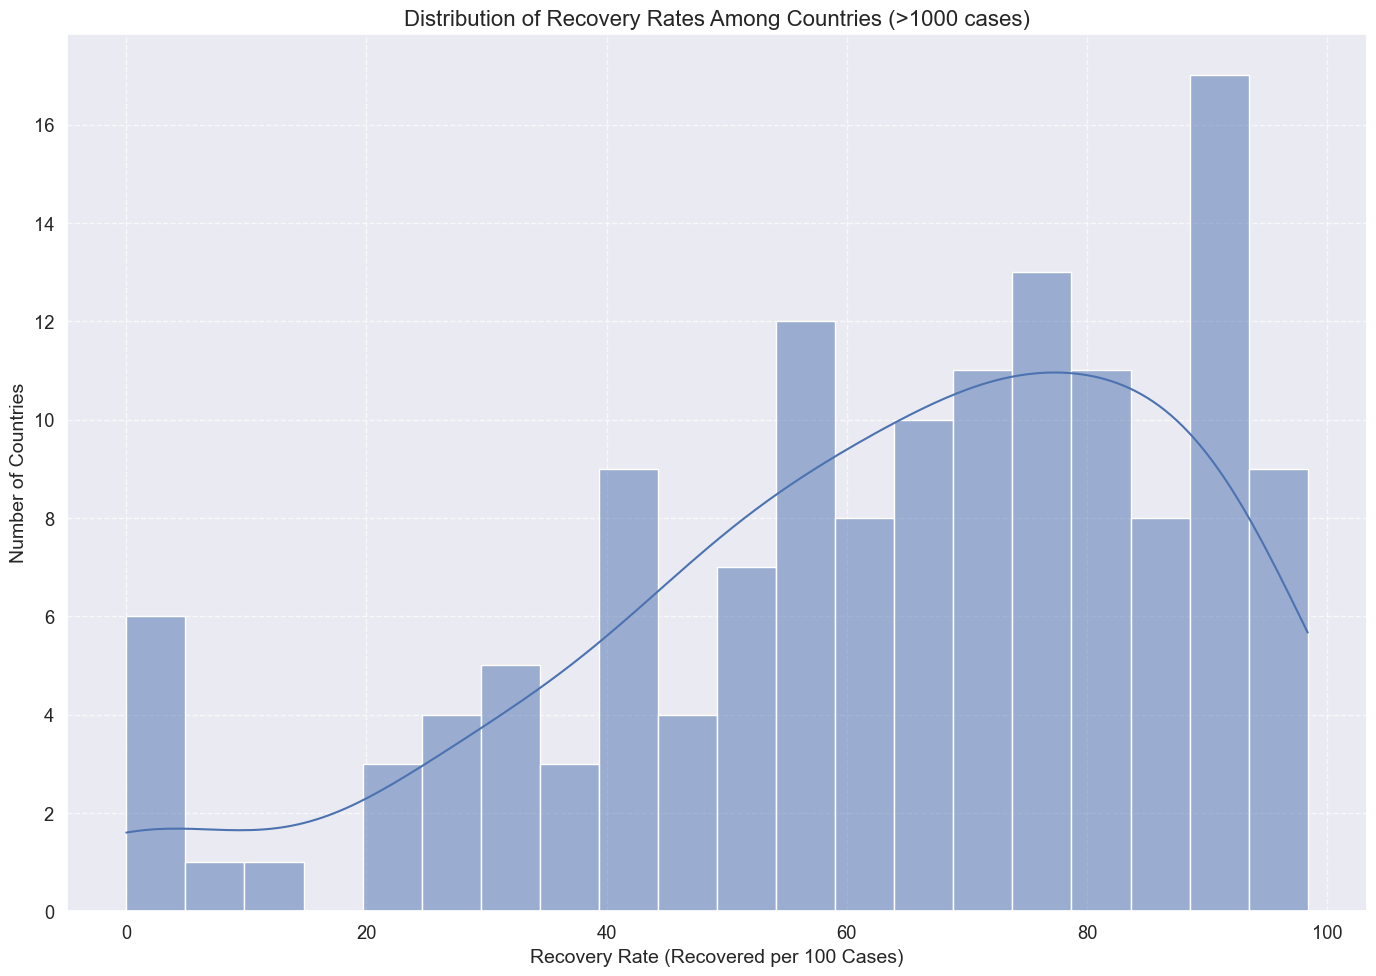

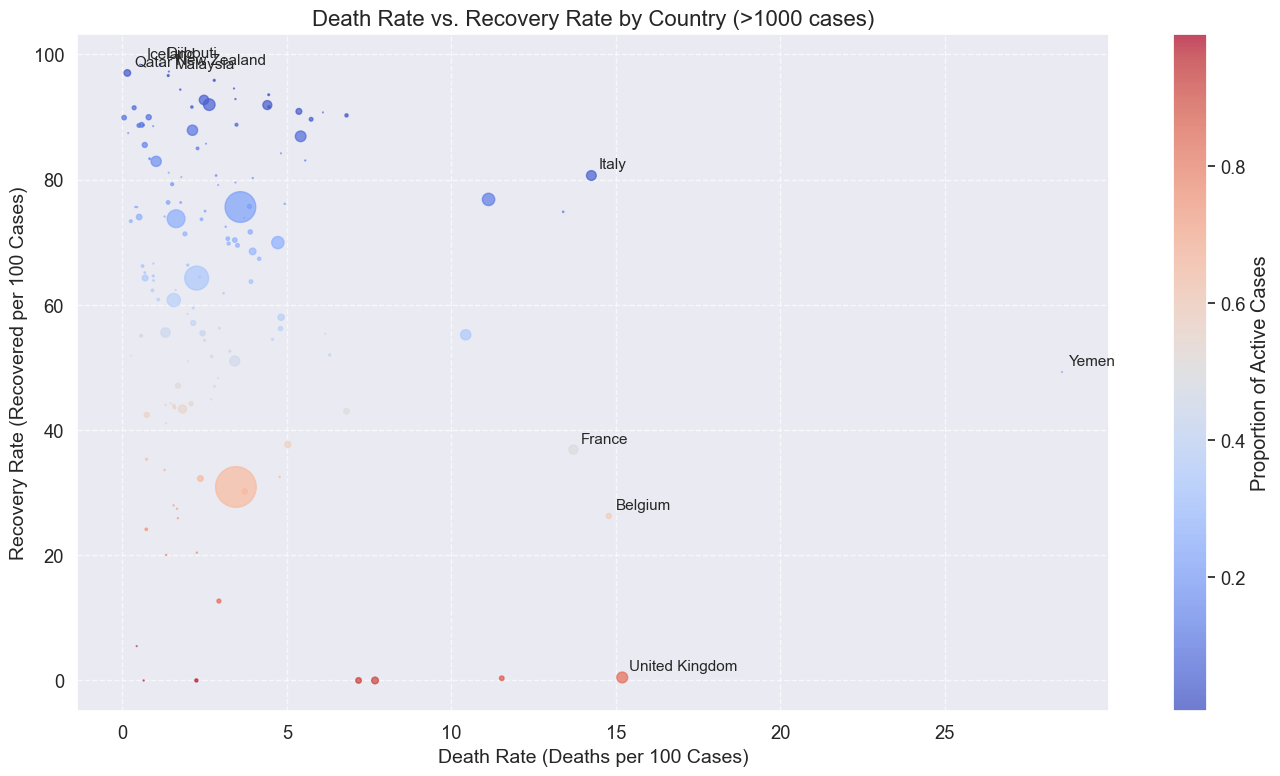


--- Key Insights and Findings ---

1. Global Situation Overview:
• Total confirmed cases worldwide: 16,480,485
• Total deaths worldwide: 654,036
• Global death rate: 3.97%
• Global recovery rate: 57.45%
• Currently active cases: 6,358,362 (38.58% of total cases)

2. Regional Analysis:
• Americas has the highest number of confirmed cases with 8,839,286 cases
• Europe has the highest death rate at 6.40%

3. Country-level Analysis:
• US has the highest number of confirmed cases: 4,290,259
• US has reported the most deaths: 148,011
• Among countries with 1000+ cases, Yemen has the highest death rate: 28.56%
• Djibouti shows the highest recovery rate at 98.38%
• Zimbabwe has the fastest weekly growth rate at 57.85%

4. Comparative Analysis:
• The top 10 countries account for 76.73% of all active cases worldwide
• 17 countries/regions have reported zero deaths
• 36 countries are experiencing rapid growth (>20% weekly increase)

5. Recovery Analysis:
• 96 countries show strong recovery rates

In [1]:
# COVID-19 Global Data Tracker
# =========================================================================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
   import seaborn as sns
except ImportError:
   print("Seaborn is not installed. Please install it using 'pip install seaborn'.")
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (14, 8)

# =========================================================================================
# 1. Data Loading & Exploration
# =========================================================================================

print("Loading COVID-19 dataset...")
df = pd.read_csv('country_wise_latest.csv')

# Display basic information
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nStatistical summary:")
print(df.describe())

# =========================================================================================
# 2. Data Cleaning
# =========================================================================================

print("\n--- Data Cleaning ---")

# Check for any duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Make a copy of the dataframe to avoid modifying the original
clean_df = df.copy()

# Check column names for consistency and ease of use
print("\nCleaning column names...")
clean_df.columns = [col.lower().strip().replace(" ", "_").replace("/", "_") for col in clean_df.columns]
print("New column names:", clean_df.columns.tolist())

# Handle missing values if any
if clean_df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For numeric columns, fill NAs with 0
    numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns
    clean_df[numeric_cols] = clean_df[numeric_cols].fillna(0)
    
    # For categorical columns, fill NAs with 'Unknown'
    cat_cols = clean_df.select_dtypes(include=['object']).columns
    clean_df[cat_cols] = clean_df[cat_cols].fillna('Unknown')
    
    print("Missing values after cleaning:")
    print(clean_df.isnull().sum())

# =========================================================================================
# 3. Exploratory Data Analysis (EDA)
# =========================================================================================

print("\n--- Exploratory Data Analysis ---")

# Top 10 countries by confirmed cases
top_countries_by_cases = clean_df.sort_values('confirmed', ascending=False).head(10)
print("\nTop 10 Countries by Confirmed Cases:")
print(top_countries_by_cases[['country_region', 'confirmed', 'deaths', 'recovered', 'active']])

# Calculate global totals
global_confirmed = clean_df['confirmed'].sum()
global_deaths = clean_df['deaths'].sum()
global_recovered = clean_df['recovered'].sum()
global_active = clean_df['active'].sum()

print(f"\nGlobal Totals:")
print(f"Confirmed Cases: {global_confirmed:,}")
print(f"Deaths: {global_deaths:,}")
print(f"Recovered: {global_recovered:,}")
print(f"Active Cases: {global_active:,}")

# Calculate global rates
global_death_rate = (global_deaths / global_confirmed) * 100
global_recovery_rate = (global_recovered / global_confirmed) * 100

print(f"\nGlobal Rates:")
print(f"Death Rate: {global_death_rate:.2f}%")
print(f"Recovery Rate: {global_recovery_rate:.2f}%")

# =========================================================================================
# 4. Data Visualizations
# =========================================================================================

print("\n--- Creating Visualizations ---")

# Visualization 1: Top 10 Countries by Confirmed Cases
plt.figure(figsize=(14, 8))
sns.barplot(x='confirmed', y='country_region', data=top_countries_by_cases, palette='viridis')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Top 10 Countries by Death Count
top_countries_by_deaths = clean_df.sort_values('deaths', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='deaths', y='country_region', data=top_countries_by_deaths, palette='rocket')
plt.title('Top 10 Countries by COVID-19 Deaths', fontsize=16)
plt.xlabel('Deaths', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Death Rate for Top 10 Countries with highest cases
# Ensure the 'deaths_100_cases' column exists
if 'deaths_100_cases' not in clean_df.columns:
    clean_df['deaths_100_cases'] = (clean_df['deaths'] / clean_df['confirmed']) * 100

plt.figure(figsize=(14, 8))
sns.barplot(x='deaths_100_cases', y='country_region', data=clean_df, palette='coolwarm')
plt.title('Death Rate (Deaths per 100 Cases) in Top 10 Countries by Cases', fontsize=16)
plt.xlabel('Deaths per 100 Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 4: Recovery Rate for Top 10 Countries with highest cases
# Make sure we're using the correct column name from the dataset
plt.figure(figsize=(14, 8))
sns.barplot(x='recovered___100_cases', y='country_region', data=top_countries_by_cases, palette='YlGn')
plt.title('Recovery Rate (Recovered per 100 Cases) in Top 10 Countries by Cases', fontsize=16)
plt.xlabel('Recovered per 100 Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 5: WHO Regional Analysis
region_data = clean_df.groupby('who_region').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum',
    'active': 'sum'
}).reset_index()

# Calculate death rate by region
region_data['death_rate'] = (region_data['deaths'] / region_data['confirmed']) * 100
region_data['recovery_rate'] = (region_data['recovered'] / region_data['confirmed']) * 100

print("\nCOVID-19 Statistics by WHO Region:")
print(region_data)

# Plot cases by WHO region
plt.figure(figsize=(14, 8))
sns.barplot(x='confirmed', y='who_region', data=region_data, palette='viridis')
plt.title('Total COVID-19 Cases by WHO Region', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=14)
plt.ylabel('WHO Region', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot death rates by WHO region
plt.figure(figsize=(14, 8))
sns.barplot(x='death_rate', y='who_region', data=region_data, palette='rocket')
plt.title('COVID-19 Death Rate by WHO Region', fontsize=16)
plt.xlabel('Death Rate (%)', fontsize=14)
plt.ylabel('WHO Region', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 6: Weekly Percentage Increase Analysis
plt.figure(figsize=(14, 8))
top_weekly_increase = clean_df.sort_values('1_week_%_increase', ascending=False).head(15)
sns.barplot(x='1_week_%_increase', y='country_region', data=top_weekly_increase, palette='Reds')
plt.title('Top 15 Countries by Weekly Percentage Increase in Cases', fontsize=16)
plt.xlabel('1 Week % Increase', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 7: Active vs. Recovered Cases Relationship (for countries with significant cases)
significant_countries = clean_df[clean_df['confirmed'] > 10000].copy()
plt.figure(figsize=(14, 10))
plt.scatter(significant_countries['active'], significant_countries['recovered'], 
           alpha=0.6, s=significant_countries['confirmed']/5000, c=significant_countries['deaths'], cmap='YlOrRd')

plt.title('Active vs. Recovered Cases by Country', fontsize=16)
plt.xlabel('Active Cases', fontsize=14)
plt.ylabel('Recovered Cases', fontsize=14)
plt.colorbar(label='Death Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate some significant countries
for i, row in significant_countries.nlargest(10, 'confirmed').iterrows():
    plt.annotate(row['country_region'], 
                xy=(row['active'], row['recovered']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=11)
plt.show()

# Visualization 8: Distribution of Recovery Rates
plt.figure(figsize=(14, 10))
# Exclude countries with very small case numbers to avoid skewed distributions
sns.histplot(clean_df[clean_df['confirmed'] > 1000]['recovered___100_cases'], bins=20, kde=True)
plt.title('Distribution of Recovery Rates Among Countries (>1000 cases)', fontsize=16)
plt.xlabel('Recovery Rate (Recovered per 100 Cases)', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 9: Death vs Recovery Rate Comparison
plt.figure(figsize=(14, 8))
# Create a scatter plot of death rate vs recovery rate
plt.scatter(clean_df[clean_df['confirmed'] > 1000]['deaths_100_cases'], 
           clean_df[clean_df['confirmed'] > 1000]['recovered___100_cases'],
           alpha=0.7, 
           s=clean_df[clean_df['confirmed'] > 1000]['confirmed']/5000, 
           c=clean_df[clean_df['confirmed'] > 1000]['active']/clean_df[clean_df['confirmed'] > 1000]['confirmed'],
           cmap='coolwarm')

plt.title('Death Rate vs. Recovery Rate by Country (>1000 cases)', fontsize=16)
plt.xlabel('Death Rate (Deaths per 100 Cases)', fontsize=14)
plt.ylabel('Recovery Rate (Recovered per 100 Cases)', fontsize=14)
plt.colorbar(label='Proportion of Active Cases')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some outliers
for i, row in clean_df[clean_df['confirmed'] > 1000].nlargest(5, 'deaths_100_cases').iterrows():
    plt.annotate(row['country_region'], 
                xy=(row['deaths_100_cases'], row['recovered___100_cases']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=11)
    
for i, row in clean_df[clean_df['confirmed'] > 1000].nlargest(5, 'recovered___100_cases').iterrows():
    plt.annotate(row['country_region'], 
                xy=(row['deaths_100_cases'], row['recovered___100_cases']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=11)
plt.tight_layout()
plt.show()

# =========================================================================================
# 5. Key Insights and Findings
# =========================================================================================

print("\n--- Key Insights and Findings ---")

# 1. Global Situation Overview
print("\n1. Global Situation Overview:")
print(f"• Total confirmed cases worldwide: {global_confirmed:,}")
print(f"• Total deaths worldwide: {global_deaths:,}")
print(f"• Global death rate: {global_death_rate:.2f}%")
print(f"• Global recovery rate: {global_recovery_rate:.2f}%")
print(f"• Currently active cases: {global_active:,} ({(global_active/global_confirmed*100):.2f}% of total cases)")

# 2. Regional Analysis
top_region = region_data.sort_values('confirmed', ascending=False).iloc[0]
worst_death_rate_region = region_data.sort_values('death_rate', ascending=False).iloc[0]
print("\n2. Regional Analysis:")
print(f"• {top_region['who_region']} has the highest number of confirmed cases with {top_region['confirmed']:,} cases")
print(f"• {worst_death_rate_region['who_region']} has the highest death rate at {worst_death_rate_region['death_rate']:.2f}%")

# 3. Country-level Analysis
most_cases = clean_df.loc[clean_df['confirmed'].idxmax()]
most_deaths = clean_df.loc[clean_df['deaths'].idxmax()]
highest_death_rate = clean_df[clean_df['confirmed'] > 1000].loc[clean_df[clean_df['confirmed'] > 1000]['deaths_100_cases'].idxmax()]
highest_recovery = clean_df[clean_df['confirmed'] > 1000].loc[clean_df[clean_df['confirmed'] > 1000]['recovered___100_cases'].idxmax()]
fastest_growing = clean_df[clean_df['confirmed'] > 1000].loc[clean_df[clean_df['confirmed'] > 1000]['1_week_%_increase'].idxmax()]

print("\n3. Country-level Analysis:")
print(f"• {most_cases['country_region']} has the highest number of confirmed cases: {most_cases['confirmed']:,}")
print(f"• {most_deaths['country_region']} has reported the most deaths: {most_deaths['deaths']:,}")
print(f"• Among countries with 1000+ cases, {highest_death_rate['country_region']} has the highest death rate: {highest_death_rate['deaths_100_cases']:.2f}%")
# Fix for the KeyError on line 295 - use the correct column name
print(f"• {highest_recovery['country_region']} shows the highest recovery rate at {highest_recovery['recovered___100_cases']:.2f}%")
print(f"• {fastest_growing['country_region']} has the fastest weekly growth rate at {fastest_growing['1_week_%_increase']:.2f}%")

# 4. Comparative Analysis
top10_active = clean_df.nlargest(10, 'active')['active'].sum()
active_percent = (top10_active / global_active) * 100

print("\n4. Comparative Analysis:")
print(f"• The top 10 countries account for {active_percent:.2f}% of all active cases worldwide")
print(f"• {len(clean_df[clean_df['deaths'] == 0])} countries/regions have reported zero deaths")
print(f"• {len(clean_df[clean_df['1_week_%_increase'] > 20])} countries are experiencing rapid growth (>20% weekly increase)")

# 5. Recovery Analysis
print("\n5. Recovery Analysis:")
countries_high_recovery = len(clean_df[clean_df['recovered___100_cases'] > 70])
countries_low_recovery = len(clean_df[clean_df['recovered___100_cases'] < 30])
print(f"• {countries_high_recovery} countries show strong recovery rates (>70%)")
print(f"• {countries_low_recovery} countries show concerning low recovery rates (<30%)")

# =========================================================================================
# 6. Conclusion
# =========================================================================================

print("\n--- Conclusion ---")
print("""
This analysis provides a snapshot of the global COVID-19 situation based on the dataset provided. 
Key observations include:

1. The pandemic's impact varies significantly by region and country, with some areas experiencing
   much higher case loads, death rates, and growth rates than others.

2. While some countries show promising recovery rates, others continue to struggle with 
   containing active cases and improving outcomes.

3. The weekly growth rate indicates where the pandemic is accelerating, highlighting areas
   that may need additional attention and resources.

4. Regional differences in death and recovery rates might indicate variations in healthcare
   capacity, reporting methodologies, or effectiveness of public health measures.

5. The concentration of active cases in a relatively small number of countries suggests that
   targeted international support could have significant impact on the global situation.

These findings can help inform public health decisions, resource allocation, and international
cooperation efforts to address the ongoing pandemic.
""")

print("\nAnalysis completed successfully!")